<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign9_Euclidianos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
arquivo_tedio = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Assign6/dadosTedioProcessados.xlsx"
df_tedio = pd.read_excel(arquivo_tedio)

df_tedio = df_tedio.drop(columns=['female', 'male', 'angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
filtro  = df_tedio["game_id"] == 1
df_tedio = df_tedio[filtro]

# visualizar as 8 primeiras entradas do df
df_tedio.head(8)

,game_id,uuid,timestamp,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,1,6,1605708643465,0.508354,0.438171,0.568929,0.503775,0.541945,0.412132,0.804956,0.317154,0.504712,0.159364,0.948892,0.583862,0.442474,0.539523,0.490200,0.356116,0.162099,0.567227,0.730479,0.692829,0.453265,0.240817,0.547966,0.369644
1,1,6,1605708643974,0.512699,0.401146,0.553978,0.515166,0.496334,0.321135,0.746664,0.349567,0.458235,0.147308,0.916702,0.671186,0.514465,0.518944,0.431107,0.567169,0.153490,0.288593,0.707789,0.392665,0.610123,0.218132,0.574083,0.298309
2,1,6,1605708644480,0.506603,0.438182,0.563435,0.515138,0.487306,0.316582,0.766587,0.323285,0.495010,0.156914,0.958596,0.627930,0.523984,0.490657,0.447523,0.523908,0.206125,0.510279,0.666611,0.644468,0.590516,0.299635,0.562027,0.212047
3,1,6,1605708644995,0.511641,0.412832,0.548867,0.525097,0.475351,0.276429,0.770756,0.284161,0.464545,0.144001,0.927550,0.594060,0.452579,0.486386,0.333938,0.601764,0.183658,0.456423,0.757045,0.605616,0.557656,0.137957,0.547788,0.482396
4,1,6,1605708645496,0.508116,0.408212,0.547688,0.528549,0.453773,0.272925,0.757568,0.292917,0.475886,0.170430,0.919601,0.690201,0.436305,0.475365,0.493316,0.656315,0.222828,0.371406,0.767575,0.523756,0.495205,0.150021,0.632183,0.431408
5,1,6,1605708646011,0.499293,0.423723,0.552927,0.535816,0.452771,0.349431,0.862724,0.203309,0.677877,NaN,NaN,0.521792,0.425967,0.466244,0.487644,0.665776,NaN,0.498084,0.698859,0.604908,0.654111,0.095276,0.588753,0.539339
6,1,6,1605708646525,0.512229,0.410202,0.551289,0.518838,0.488063,0.287870,0.746702,0.303827,0.450450,0.165265,0.881407,0.524280,0.497531,0.481512,0.320369,0.561154,0.186003,0.476983,0.825256,0.672080,0.536526,0.102200,0.462169,0.483916
7,1,6,1605708647033,0.508762,0.410813,0.551905,0.519029,0.487940,0.311347,0.744142,0.321165,0.438788,0.187241,0.926794,0.577611,0.500968,0.497372,0.362701,0.559950,0.259109,0.510396,0.787959,0.714594,0.541962,0.153237,0.533681,0.468639


In [ ]:
# verificar o tamanho do df
print("Variáveis:\t {}".format(df_tedio.shape[1]))
print("Entradas:\t {}".format(df_tedio.shape[0]))

Variáveis:	 9
Entradas:	 18278


In [ ]:
# vizualisar os nomes das colunas
df_tedio.columns

Index(['game_id', 'uuid', 'timestamp', 'angry', 'disgusted', 'fear', 'sad',
       'surprised', 'happy'],
      dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df_tedio.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
dtype: object

## 1.2 Criando classes para a base de dados

In [ ]:
# função para classificar os dados como tédio (1) ou estresse (0)
def def_tedio(c):
  if c['angry'] >= 0.1 and c['disgusted'] >= 0.1:
    return 1
  elif c['sad'] >= 0.1 and c['surprised'] >= 0.1:
    return 1
  else:
    return 0

In [ ]:
# criar a coluna 'target' para o df_tedio
df_tratado = pd.DataFrame(df_tedio)

df_tratado['target'] = df_tedio.apply(def_tedio, axis=1)

df_tratado.head(8)

,game_id,uuid,timestamp,angry,disgusted,fear,sad,surprised,happy,target
0,1,6,1605708643465,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196,1
1,1,6,1605708643974,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284,1
2,1,6,1605708644480,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262,1
3,1,6,1605708644995,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635,1
4,1,6,1605708645496,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826,1
5,1,6,1605708646011,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499,1
6,1,6,1605708646525,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902,1
7,1,6,1605708647033,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097,1


In [ ]:
# verificar o tipo de dado de cada coluna
df_tratado.dtypes

game_id        int64
uuid           int64
timestamp      int64
angry        float64
disgusted    float64
fear         float64
sad          float64
surprised    float64
happy        float64
target         int64
dtype: object

In [ ]:
# verificar que colunas tem valores NaN (Not a Number)
df_tratado.isnull().any()

game_id      False
uuid         False
timestamp    False
angry         True
disgusted     True
fear          True
sad           True
surprised     True
happy         True
target       False
dtype: bool

In [ ]:
# Completando os registros que tem valor NaN com 0.0
df_tratado = df_tratado.fillna(0.0)

## 1.3 Conjunto de dados para treinamento e teste

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['target']), df_tratado.target, test_size=0.3)

## 1.4 Correlação
Baseado em [Como selecionar as melhores features para seu modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

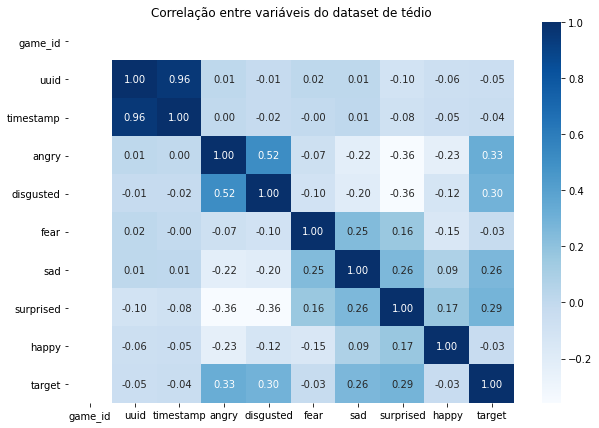

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(df_tratado.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

O valor mostrado para cada correlação vai de -1 — que indica uma correlação negativa perfeita — a +1 — uma correlação positiva perfeita. Vale lembrar que a função .corr() traz, por padrão, a correlação de Pearson, mostrando um relacionamento linear entre as variáveis. Em casos onde há um relacionamento não-linear, a matriz pode não ser uma boa medida.

## 1.5 Feature Importance
O feature_importance_ retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

array([0.        , 0.01688849, 0.01643772, 0.23982439, 0.23946002,
       0.01473594, 0.18690648, 0.26245558, 0.02329138])

É retornado um array com quatro elementos. Se você somar todos eles, verá que o resultado será 1. Ao analisar esse array, podemos ver que a feature mais importante para o algoritmo Floresta Randômica foi a variável 'surprised'.

Text(0.5, 1.0, 'Importância de cada feature')

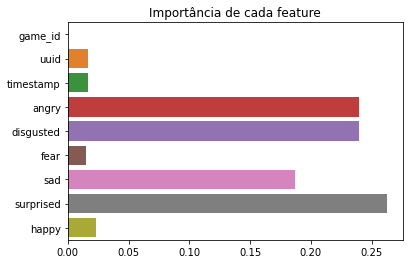

In [ ]:
importances = pd.Series(data=clf_RFC.feature_importances_, index=df_tratado.columns[0:9])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

As vezes, os valores mostrados pelo feature_importances_ pode ser enviesado dependendo dos parâmetros definidos na criação do objeto. Evitar usar os parâmetros default do Floresta Randômica.

# 2. Regressões

## 2.1 Regressão Linear Simples e Multipla


*   [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
*   [Implementando Regressão Linear Simples em Python](https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8)
*   [Regressão Linear](https://www.kaggle.com/marilivb/4-regress-o-linear)
*   [https://www.datageeks.com.br/regressao-linear/](https://www.datageeks.com.br/regressao-linear/)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Criar um objeto de regressão linear
regr = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treinamento
regr.fit(X_treinamento, y_treinamento)

# Fazer predições usando o conjunto de teste
y_pred = regr.predict(X_teste)

In [ ]:
# Os coeficientes encontrados
print('Coeficientes: \n', regr.coef_)
# O Erro Médio Quadrático (EMQ)
print('Erro Médio Quadrático (EMQ): %.2f'
      % mean_squared_error(y_teste, y_pred))
# O coeficiente de determinação: 1 é a predição perfeita
print('Coeficiente de determinação: %.2f'
      % r2_score(y_teste, y_pred))

Coeficientes: 
 [ 0.00000000e+00 -1.12900265e-03  1.97719898e-11  1.67933967e+00
  1.20694766e+00 -1.28479480e+00  9.73020185e-01  1.71334057e+00
 -7.92701540e-02]
Erro Médio Quadrático (EMQ): 0.14
Coeficiente de determinação: 0.44


### 2.1.1 Diagrama de Dispersão

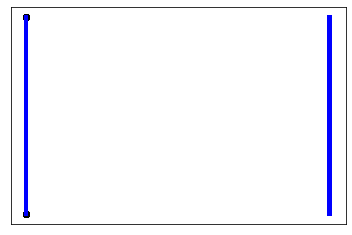

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2.2 Regressão Logística


*   [Logistic Regression using Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)
*   [Regressão Logística e Métricas de Classificação em Python](http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/)



In [ ]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(random_state=0).fit(X_treinamento, y_treinamento)
clf_LR.predict(X_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
clf_LR.predict_proba(X_teste)

array([[0.57800055, 0.42199945],
       [0.57785705, 0.42214295],
       [0.57801713, 0.42198287],
       ...,
       [0.57761008, 0.42238992],
       [0.5779925 , 0.4220075 ],
       [0.57801721, 0.42198279]])

In [ ]:
clf_LR.score(X_treinamento, y_treinamento)

0.5777708300765984

### 2.2.1 Diagrama de Dispersão

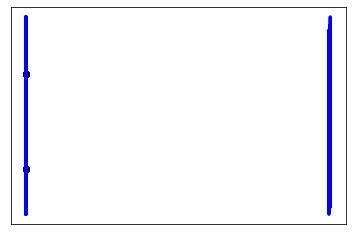

In [ ]:
# plotar saídas
plt.scatter(X_teste.iloc[:,0].values, y_teste,  color='black')
plt.plot(X_teste, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# 3. Detecção de anomalias
Referências:


*   [Anomaly Detection Techniques in Python](https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf)
*   [4 Automatic Outlier Detection Algorithms in Python](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
*   [Learn how to develop highly accurate models to detect anomalies using Artificial Neural Networks with the Tensorflow library in Python3.](https://outline.com/D8jZMf)


## 3.1 Métodos Estatísticos

### 3.1.1 Paramétricos: Diagrama de Caixa

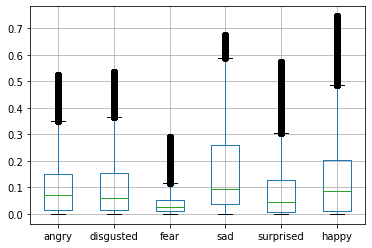

In [ ]:
boxplot = df_tratado.boxplot(column=['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'])

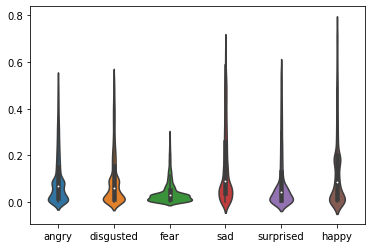

In [ ]:
df_emocoes = df_tratado.copy(deep=True)
df_emocoes = df_emocoes.drop(columns=['game_id', 'uuid', 'timestamp', 'target'])
ax = sns.violinplot(data=df_emocoes)

### 3.1.2 Não Paramétricos: Análise de Histograma

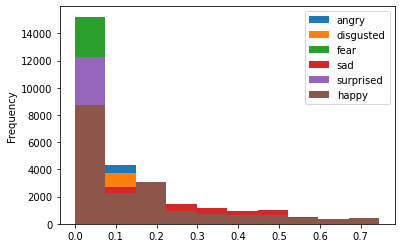

In [ ]:
#ax = df_emocoes.plot.hist(bins=12, alpha=0.5)
ax = df_emocoes.plot.hist()

## 3.2 Métodos Algorítmicos

### 3.2.1 Proximidade: Local Outlier Factor (LOF)
Referências:

*   [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)
*   [sklearn.neighbors.LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)
*   [Outlier detection with Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)
*   [Anomaly detection with Local Outlier Factor (LOF)](https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2)

### 3.2.2 Redes Neurais: Redes Neurais Supervisionadas
Referências:


*   [Comparing anomaly detection algorithms for outlier detection on toy datasets](https://scikit-learn.org/0.20/auto_examples/plot_anomaly_comparison.html)
*   [How to use machine learning for anomaly detection and condition monitoring](https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7)



## 3.3 Machine Learning

### 3.3.1. Árvores de decisão

### 3.3.2 Florestas de isolamento (*Isolation Forest*)
Referências:

*   [2.7. Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)
*   [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
*   [Anomaly Detection with Isolation Forest & Visualization](https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2)
*   [Anomaly Detection Using Isolation Forest in Python](https://blog.paperspace.com/anomaly-detection-isolation-forest/)


In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_emocoes[['angry']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
df = pd.DataFrame(df_emocoes['angry'])
df['scores']=model.decision_function(df[['angry']])
df['anomaly']=model.predict(df[['angry']])
df.head(20)

,angry,scores,anomaly
0,0.034800,0.106804,1
1,0.040922,0.104435,1
2,0.029513,0.093926,1
3,0.037817,0.107444,1
4,0.040636,0.099176,1
5,0.024871,0.071883,1
6,0.042983,0.102639,1
7,0.037752,0.108330,1
8,0.032165,0.101455,1
9,0.036980,0.104727,1


In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          angry    scores  anomaly
196    0.374793 -0.069955       -1
197    0.353724 -0.062901       -1
198    0.310167 -0.010416       -1
199    0.416074 -0.105517       -1
200    0.392648 -0.079422       -1
...         ...       ...      ...
17890  0.361848 -0.078691       -1
17891  0.352857 -0.062243       -1
17892  0.413851 -0.103740       -1
17893  0.439740 -0.107853       -1
17895  0.491847 -0.152428       -1

[1821 rows x 3 columns]


In [ ]:
outliers_counter = len(df[df['angry'] > 0.5])
outliers_counter

96

In [ ]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 18.96875


In [ ]:
#specify the 12 metrics column names to be modelled
to_model_columns=df_emocoes[0:7]
to_model_columns

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df_emocoes)
pred = clf.predict(df_emocoes)
df_emocoes['anomaly']=pred
outliers=df_emocoes.loc[df_emocoes['anomaly']==-1]
outlier_index=list(outliers.index)
print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df_emocoes['anomaly'].value_counts())

[200, 210, 222, 239, 240, 316, 375, 377, 378, 379, 380, 396, 411, 412, 413, 414, 415, 416, 417, 426, 439, 441, 442, 443, 444, 468, 485, 486, 515, 533, 535, 539, 540, 626, 641, 646, 647, 657, 691, 692, 693, 696, 697, 758, 759, 764, 771, 779, 858, 876, 877, 878, 880, 881, 883, 884, 885, 886, 887, 890, 891, 892, 893, 897, 905, 906, 913, 916, 917, 919, 920, 922, 923, 924, 925, 926, 927, 928, 930, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 943, 944, 951, 953, 955, 956, 958, 993, 996, 1013, 1102, 1107, 1131, 1132, 1206, 1212, 1265, 1266, 1267, 1282, 1302, 1332, 1333, 1337, 1351, 1352, 1353, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1371, 1377, 1394, 1398, 1401, 1407, 1424, 1425, 1428, 1429, 1430, 1440, 1441, 1443, 1445, 1451, 1452, 1460, 1461, 1462, 1465, 1472, 1482, 1498, 1501, 1503, 1506, 1507, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1528, 1529, 1530, 1532, 1533, 1534, 1535, 1540, 1542, 1543, 1544, 1557, 1558, 1559, 1564, 1583, 1587, 1588, 1589, 1590, 1591, 1592, 1593,

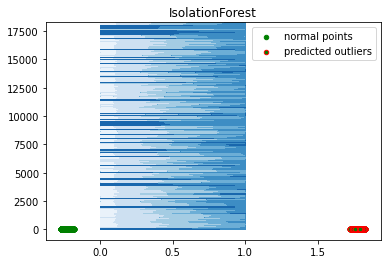

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df_emocoes)
res=pd.DataFrame(pca.transform(df_emocoes))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

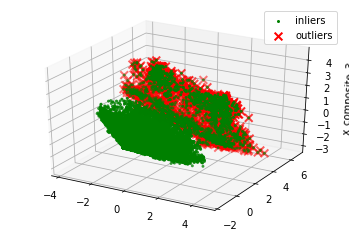

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_emocoes)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()